In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = pd.read_csv('data/Churn_Preprocess.csv', index_col=0)

In [65]:
X = data.drop(columns=['Churn'])
y = data['Churn']

X_train = X[:2200]
X_test = X[2200:]
y_train = y[:2200].values
y_test = y[2200:].values

y_train_res = y[:2200].values.reshape(-1, 1)
y_test_res = y[2200:].values.reshape(-1, 1)

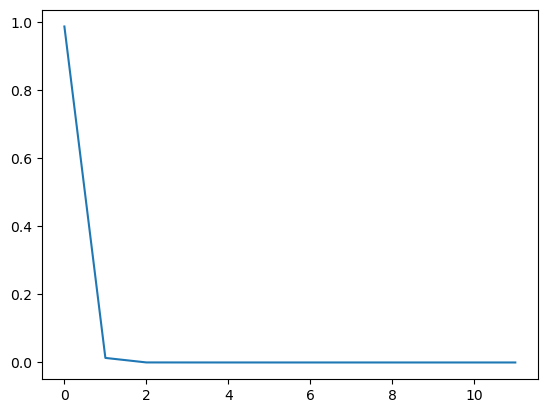

In [28]:
import matplotlib.pyplot as plt

pca = PCA(n_components=12, random_state=4)
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

In [119]:
best_pca = PCA(n_components=1, random_state=4)
best_pca.fit(X_train)

PCA(n_components=1, random_state=4)

In [120]:
values_pca = best_pca.transform(X_train)

In [121]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_validate(lr, values_pca, y_train_res)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [122]:
scores['test_score'].mean()

0.8431818181818181

In [123]:
km = KMeans(n_clusters=2, random_state=4)
km.fit(values_pca)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=2, random_state=4)

In [124]:
same_cnt = 0
for a, b in list(zip(km.labels_, y_train)):
    if a == b: same_cnt += 1

same_cnt / X_train.shape[0]

0.6654545454545454

In [126]:
val_0 = X_train[km.labels_ == 0]
val_1 = X_train[km.labels_ == 1]

In [127]:
val_1

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Call per Month,SMS per Month,Seconds per Month,Seconds per Use
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,13.44,16.00,1012.78,75.33
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,18.78,0.00,1530.33,81.50
12,25,0,38,3,15140,225,54,32,3,1,1,30,830.600,25.00,6.00,1682.22,67.29
14,9,0,37,0,15485,182,150,30,2,1,1,25,1380.015,20.22,16.67,1720.56,85.08
19,3,0,37,0,7508,127,384,43,2,1,1,25,2071.575,14.11,42.67,834.22,59.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,9,0,43,2,7893,135,401,49,3,1,1,30,1925.120,15.00,44.56,877.00,58.47
2270,13,0,43,3,11850,162,28,53,4,1,1,45,370.300,18.00,3.11,1316.67,73.15
2273,27,0,42,10,10820,101,18,48,5,1,1,55,190.815,11.22,2.00,1202.22,107.13
2283,31,0,37,5,16460,246,17,86,2,1,1,25,828.270,27.33,1.89,1828.89,66.91
